### **Logistic Regression model project description**

We are given a dataset of the Tiktok videos with various features and the target variable specifying if the video contains a claim or an opinion. We want to build a Logistic Regression model to predict if the video contains claim or an opinion from this Tiktok dataset. We will divide the dataset into Train-Test subsets. We will train the Logistic Regression model on Train dataset. We will find the model performance on the Test dataset and review its performace. We will also understand the relative importance of features in the model.

**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_columns', None)

**Import the dataset and review its contents**

In [3]:
data = pd.read_csv("tiktok_dataset.csv")

In [4]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
data.shape

(19382, 12)

In [6]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [8]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


**Check and drop the entries containing null values. Check for duplicates.**

In [9]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
data = data.dropna(axis=0)

In [11]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [12]:
data.duplicated().sum()

0

**Check if the data contains outliers. Replace these values with 75th percentile+1.5*IQR**

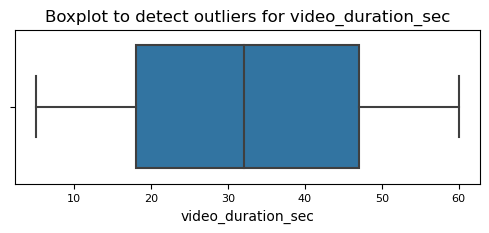

In [13]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_duration_sec', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=data['video_duration_sec'])
plt.show()

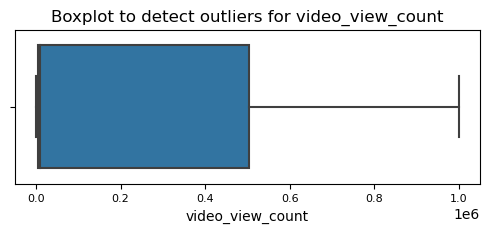

In [14]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_view_count', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=data['video_view_count'])
plt.show()

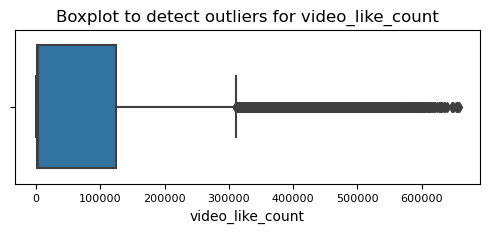

In [15]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=data['video_like_count'])
plt.show()

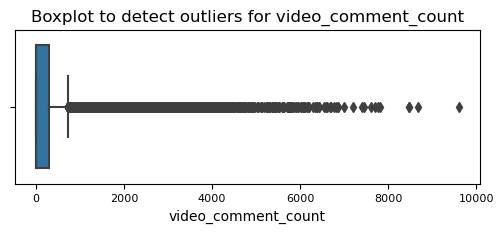

In [16]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=data['video_comment_count'])
plt.show()

In [17]:
percentile25 = data["video_like_count"].quantile(0.25)
percentile75 = data["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [18]:
percentile25 = data["video_comment_count"].quantile(0.25)
percentile75 = data["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

**Check class balance of the target variable. Use resampling to create class balance.**

In [19]:
data["verified_status"].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

In [20]:
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=0)               
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)
data_upsampled["verified_status"].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

**Create a new feature describing length of `video_transcription_text`.**

In [21]:
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [22]:
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

In [23]:
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


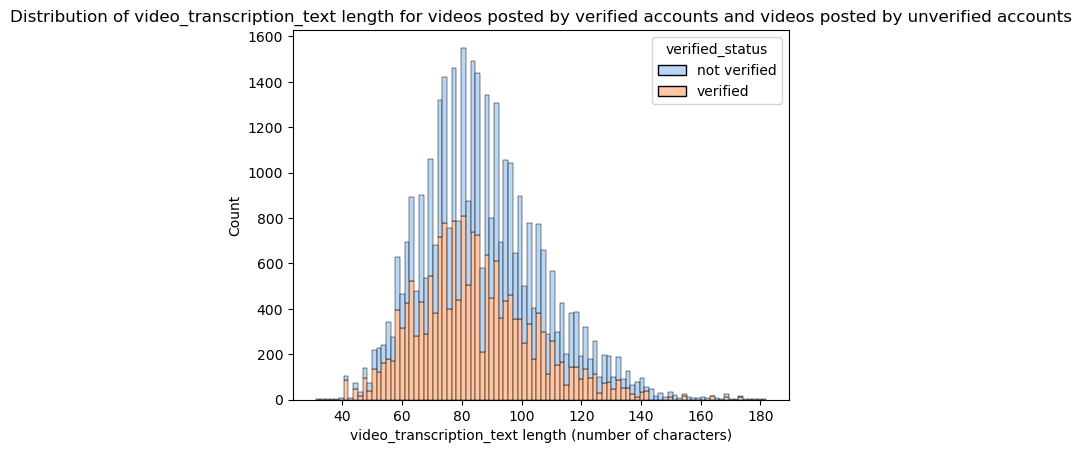

In [24]:
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

**Check for multicollinearity among features. Drop `video_like_count` to remove serious multicollinearity.**

In [25]:
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


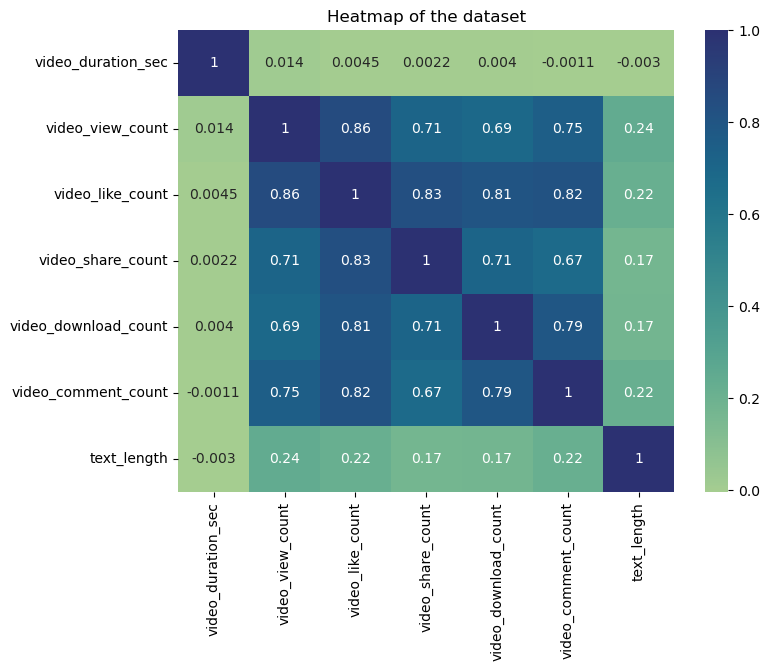

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_like_count", 
                            "video_share_count", "video_download_count", "video_comment_count", "text_length"]].corr(numeric_only=True), 
            annot=True, cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

**Change the categorical variables to numerical variables using One Hot Encoder**

In [27]:
data_upsampled.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
text_length                   int64
dtype: object

In [28]:
data_upsampled["claim_status"].unique()

array(['claim', 'opinion'], dtype=object)

In [29]:
data_upsampled["author_ban_status"].unique()

array(['under review', 'active', 'banned'], dtype=object)

In [30]:
data_upsampled_to_encode = data_upsampled[["claim_status", "author_ban_status", "verified_status"]]
data_upsampled_to_encode.head()

,claim_status,author_ban_status,verified_status
0,claim,under review,not verified
1,claim,active,not verified
2,claim,active,not verified
3,claim,active,not verified
4,claim,active,not verified


In [31]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [32]:
data_upsampled_encoded = encoder.fit_transform(data_upsampled_to_encode)

In [33]:
encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review', 'verified_status_verified'],
      dtype=object)

In [34]:
data_upsampled_encoded

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.]])

In [35]:
data_upsampled_encoded_df = pd.DataFrame(data=data_upsampled_encoded, columns=encoder.get_feature_names_out())
data_upsampled_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review,verified_status_verified
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [36]:
data_upsampled.drop(columns=["claim_status", "author_ban_status", "verified_status"]).head()

,#,video_id,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,7017666017,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97
1,2,4014381136,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,9859838091,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,1866847991,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,7105231098,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128


In [37]:
data_upsampled_final = pd.concat([data_upsampled.drop(columns=["claim_status", "author_ban_status", "verified_status"]).reset_index(drop=True), data_upsampled_encoded_df], axis=1)
data_upsampled_final.head()

,#,video_id,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review,verified_status_verified
0,1,7017666017,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0.0,0.0,1.0,0.0
1,2,4014381136,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0.0,0.0,0.0,0.0
2,3,9859838091,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0.0,0.0,0.0,0.0
3,4,1866847991,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0.0,0.0,0.0,0.0
4,5,7105231098,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0.0,0.0,0.0,0.0


**Setup for Logistic Regression: Dividing the data into features and target variable.**

In [38]:
y = data_upsampled_final["verified_status_verified"]

In [39]:
X = data_upsampled_final[["video_duration_sec", "claim_status_opinion", "author_ban_status_banned", "author_ban_status_under review", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]
X.head()

,video_duration_sec,claim_status_opinion,author_ban_status_banned,author_ban_status_under review,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,0.0,0.0,1.0,343296.0,241.0,1.0,0.0
1,32,0.0,0.0,0.0,140877.0,19034.0,1161.0,684.0
2,31,0.0,0.0,0.0,902185.0,2858.0,833.0,329.0
3,25,0.0,0.0,0.0,437506.0,34812.0,1234.0,584.0
4,19,0.0,0.0,0.0,56167.0,4110.0,547.0,152.0


**Split the data into training (75%) and testing (25%) sets.**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 8), (8942, 8), (26826,), (8942,))

**Fit the Logistic Regression Model on the Training set and produce predictions on the Test set.**

In [42]:
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train, y_train)

In [43]:
y_pred = log_clf.predict(X_test)

In [44]:
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

**Checking performance of the model on Test data using confusion matrix and various scores**

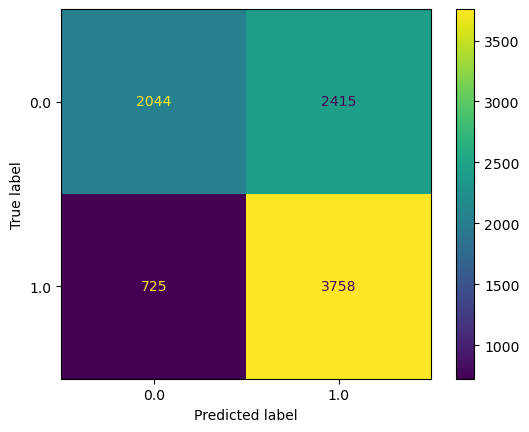

In [45]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot()
plt.show()

In [46]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.46      0.57      4459
not verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



**Display the model coefficients to understand relative importance of features**

In [52]:
coef=pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})
coef.sort_values(by=['Model Coefficient'])

,Feature Name,Model Coefficient
7,video_comment_count,-6.404235e-04
2,author_ban_status_banned,-1.781741e-05
6,video_download_count,-1.099775e-05
4,video_view_count,-2.132079e-06
3,author_ban_status_under review,-9.682447e-07
5,video_share_count,5.930971e-06
1,claim_status_opinion,3.908384e-04
0,video_duration_sec,8.607893e-03


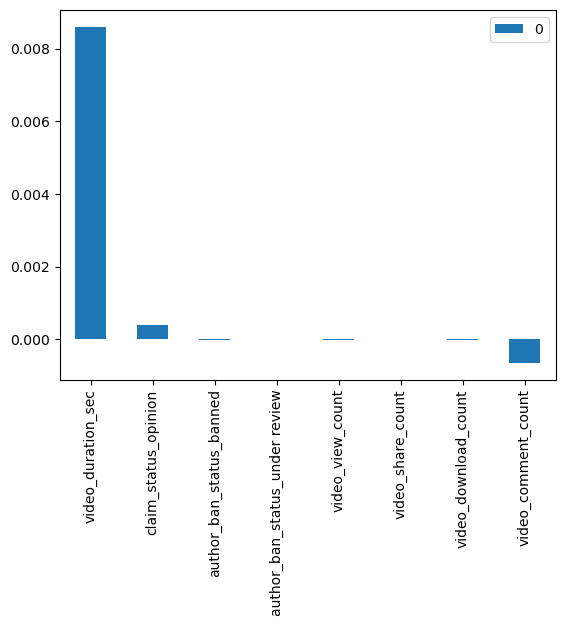

In [62]:
daf = pd.DataFrame(list(coef['Model Coefficient']),index=list(coef['Feature Name']))
plot = daf.plot(kind='bar')

**Conclusion:** We analysed the dataset by Logistic Regression model and showed its performance. The performance seems satisfactory. Relative importance of features in predicting whether a video contains claim or opinion is clear from the values of the model coefficients and the bar-plot.